In [2]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 10s 6ms/step - loss: 0.3762 - accuracy: 0.8850 - val_loss: 0.0885 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1146 - accuracy: 0.9649 - val_loss: 0.0607 - val_accuracy: 0.9828
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0857 - accuracy: 0.9737 - val_loss: 0.0482 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.9781 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0360 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch

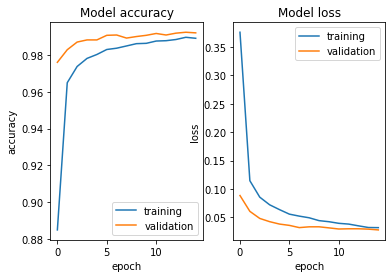

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')